<a href="https://colab.research.google.com/github/Ardulam/CursoPython/blob/main/Examen_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EXAMEN FINAL**

Curso Python

Unicafam

Estudiante: Armando Duarte

Docente: Nicolas Mojica



---


In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
dataset = '/content/crime_data.csv'
crime_data = pd.read_csv(dataset)

In [6]:
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [13]:
X = crime_data.iloc[:, 1:].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

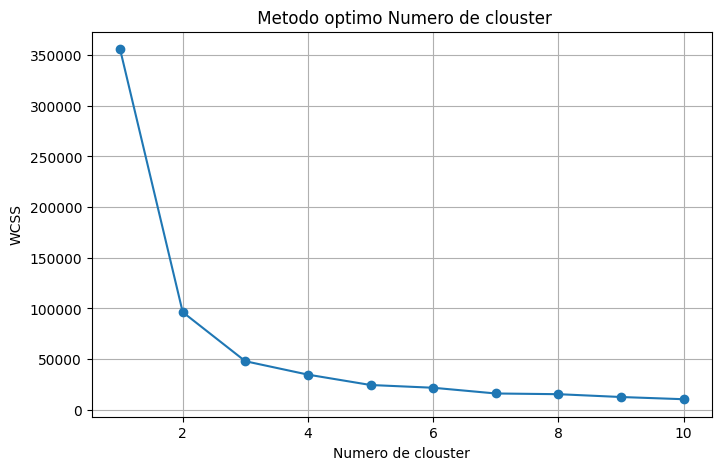

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title(' Metodo optimo Numero de clouster')
plt.xlabel('Numero de clouster')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [14]:
optimal_clusters = 4

kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

crime_data['Cluster'] = y_kmeans
crime_data.groupby('Cluster').mean(numeric_only=True)



,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,2.950000,62.700000,53.900000,11.510000
1,11.812500,272.562500,68.312500,28.375000
2,8.214286,173.285714,70.642857,22.842857
3,5.590000,112.400000,65.600000,17.270000


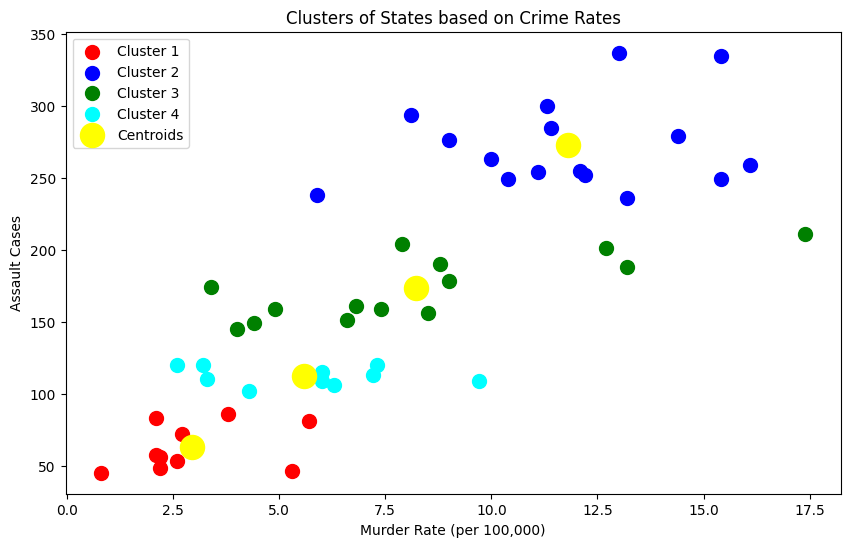

,State,Cluster
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,2
4,California,1
5,Colorado,2
6,Connecticut,3
7,Delaware,1
8,Florida,1
9,Georgia,2


In [15]:
# Visualización de los clusters basados en las tasas de criminalidad
plt.figure(figsize=(10, 6))

# Colores para cada cluster
colors = ['red', 'blue', 'green', 'cyan']

for i in range(optimal_clusters):
    plt.scatter(
        X[y_kmeans == i, 0],  # 'Murder'
        X[y_kmeans == i, 1],  # 'Assault'
        s=100, c=colors[i], label=f'Cluster {i+1}'
    )

# Centroides
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=300, c='yellow', label='Centroids'
)

plt.title('Clusters of States based on Crime Rates')
plt.xlabel('Murder Rate (per 100,000)')
plt.ylabel('Assault Cases')
plt.legend()
plt.show()

# Mostrar los estados agrupados por cluster
agrupados = crime_data[['Unnamed: 0', 'Cluster']]
agrupados.columns = ['State', 'Cluster']
agrupados

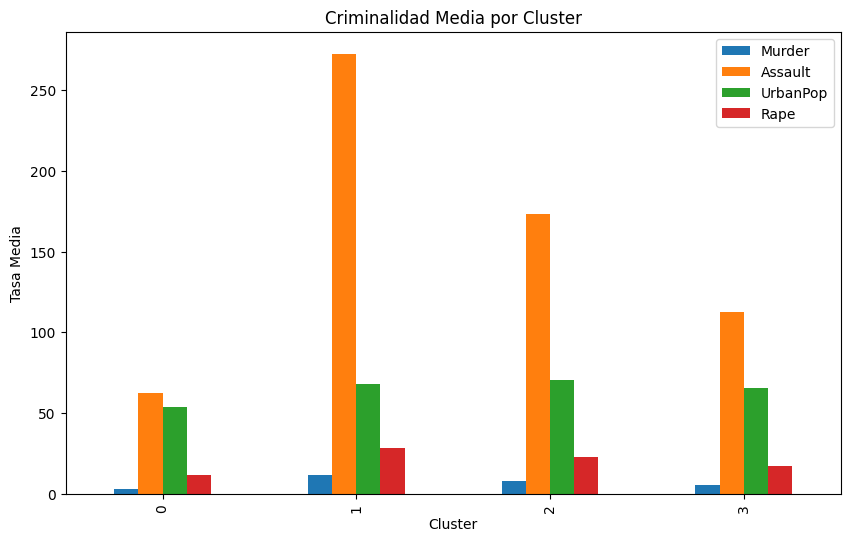

In [16]:
# Descripción de los patrones de criminalidad por cluster
crime_data.drop('Unnamed: 0', axis=1).groupby('Cluster').mean().plot(kind='bar', figsize=(10, 6)) # Drop the 'Unnamed: 0' column
plt.title('Criminalidad Media por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Tasa Media')
plt.show()

